In [ ]:
different correlations

In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                 [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                 [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
xyz

array([[ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [  2,   1,   4,   5,   8,  12,  18,  25,  96,  48],
       [  5,   3,   2,   1,   0,  -2,  -8, -11, -15, -16]])

In [21]:
#Pearson Correlation
r, p = scipy.stats.pearsonr(x, y)
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [22]:
p

0.010964341301680832

In [23]:
np.corrcoef(x, y)

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [ ]:
#Spearman Correlation Coefficient

In [15]:

x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

In [16]:
x.corr(y, method='kendall')

0.911111111111111

In [18]:
xy.corr(method='kendall')

,x-values,y-values
x-values,1.000000,0.911111
y-values,0.911111,1.000000


In [17]:
xyz.corr(method='kendall')

,x-values,y-values,z-values
x-values,1.000000,0.911111,-1.000000
y-values,0.911111,1.000000,-0.911111
z-values,-1.000000,-0.911111,1.000000


In [19]:
xy.corrwith(z, method='kendall')

x-values   -1.000000
y-values   -0.911111
dtype: float64

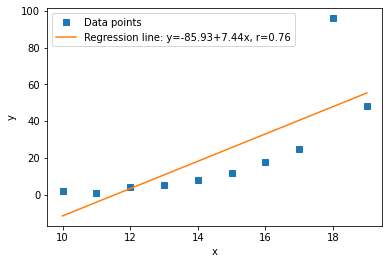

In [7]:
#X-Y plot
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

In [8]:
#Heatmaps of Correlation Matrices
corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

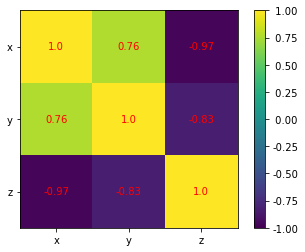

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()